<a href="https://colab.research.google.com/github/otanet/hannari_NLP_hands_on_2022/blob/main/%E6%96%87%E7%AB%A0%E6%8A%BD%E5%87%BA_20220318_2nd_v1_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 情報抽出とは  
## テキストから関連する情報を抽出するタスクのこと。

1987年から1998年に、アメリカ海軍がMessage Understanding Conferenceを主催したのが始まりと言われている。

その後、1999年から2008年に、NISTによるAutomatic Content Extraction Programが開かれました。

続いて、2009年から2018年にかけて、Text Analysis Conferenceも同様になされました。
→コンテストも行われ、固有表現名の認識から問合せ可能な大規模知識データベースが構築されました。

これらが、今のライブラリやアプリケーションに帰結していると言われています。


## Google検索が情報抽出の代表的なアプリケーション  

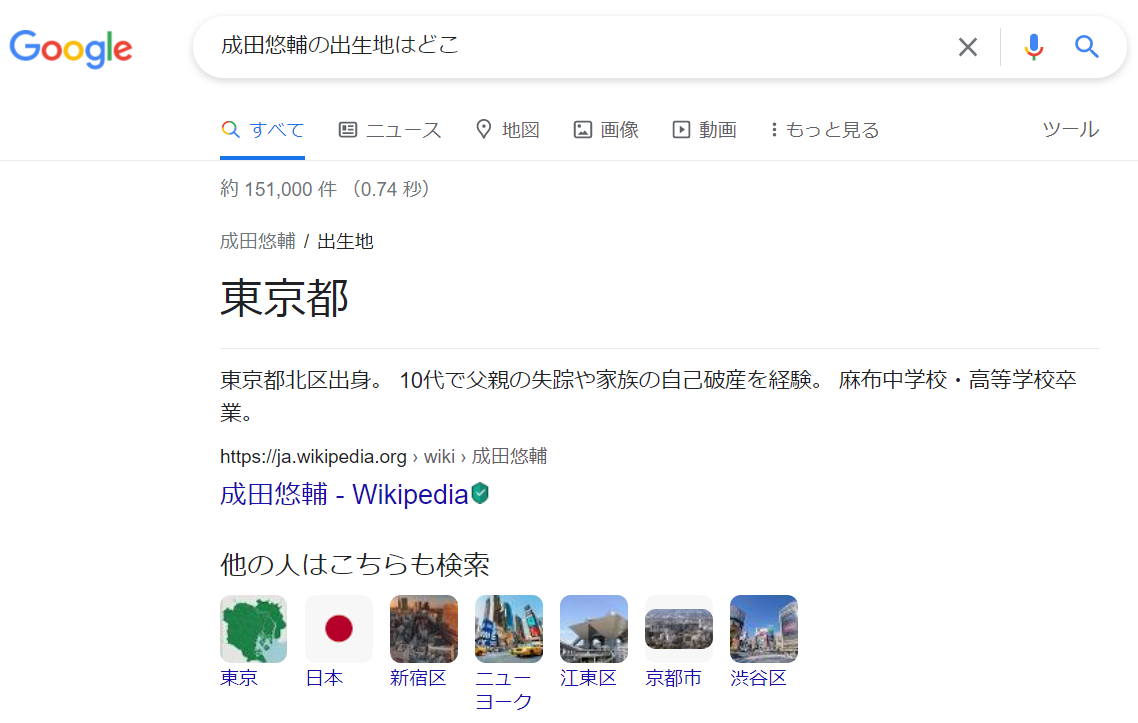


## この「成田悠輔の出生地はどこ」のクエリは、
→[成田悠輔]が人物であることを理解している上で、出生地を探すことが必要。

これを、固有表現抽出(Named Entity Reognition:NER)と言う。

-情報抽出の主なタスクを以下の表にまとめました。  
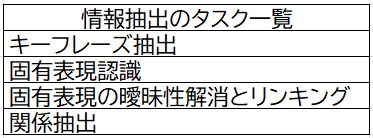



## 4.「アップルはどこ」  というクエリを投げてみたところ…  

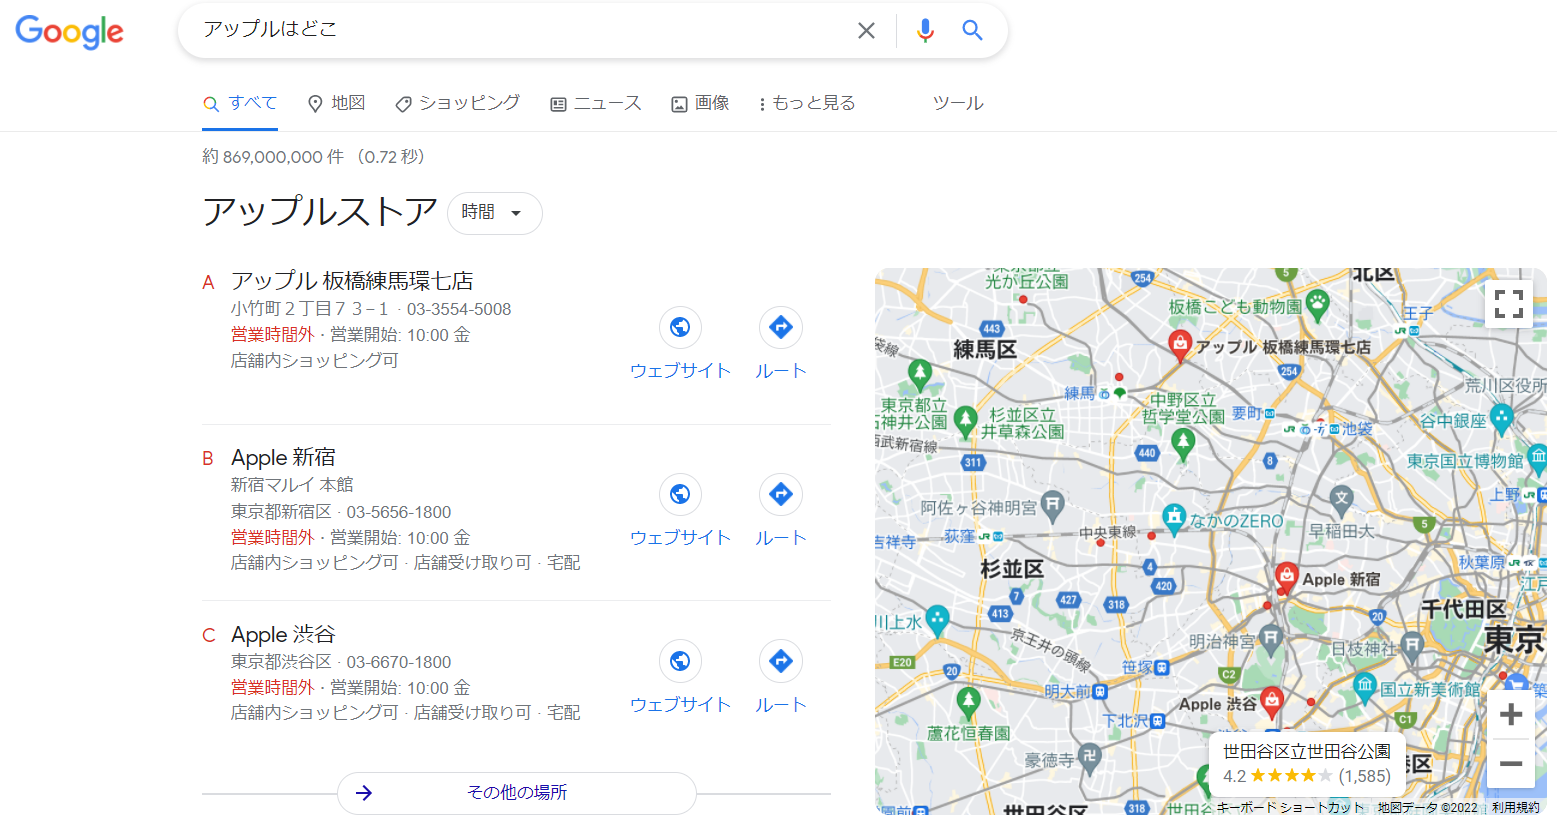




##例1）「アップルはどこ」のクエを投げた後の処理について、、、  
食べ物の「アップル」ではなく、会社の「アップル」という一意にした上で、表示している。  

→固有表現の曖昧性解消またはエンティティリンキングという。  

→→さらに、「ティム・クックがアップルのCEOです。」  
このタスクを関係抽出という。  



##例2）「表参道でおすすめのお店は」


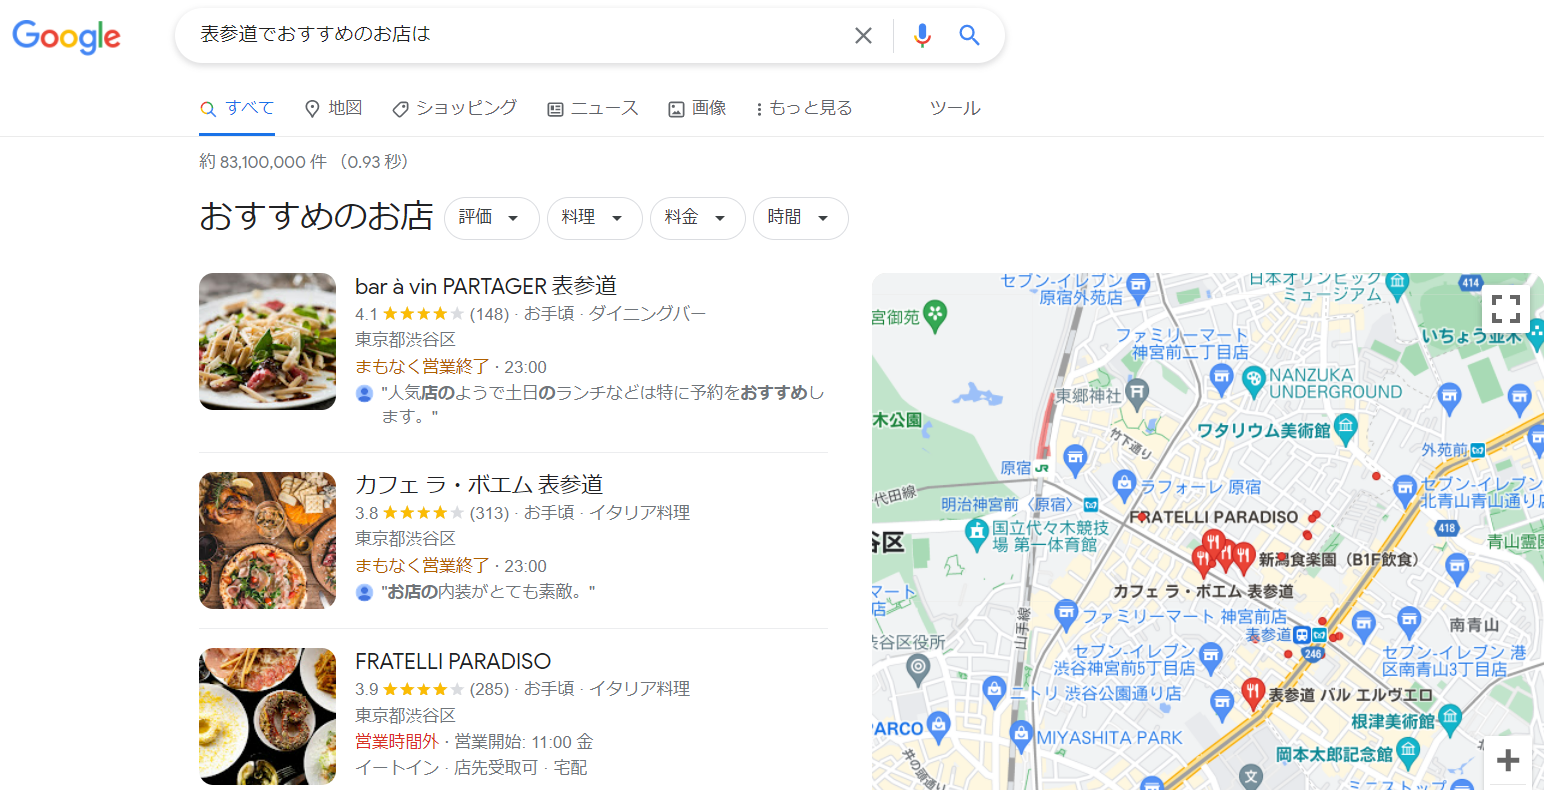

## キーフレーズ抽出とは、  
与えられたテキストから、文章の要点を捉えた重要な単語やフレーズを抽出する情報抽出タスクのことです。
→Amazonの気になるトピックのレビューを読もうのところがキーフレーズ抽出。  
  
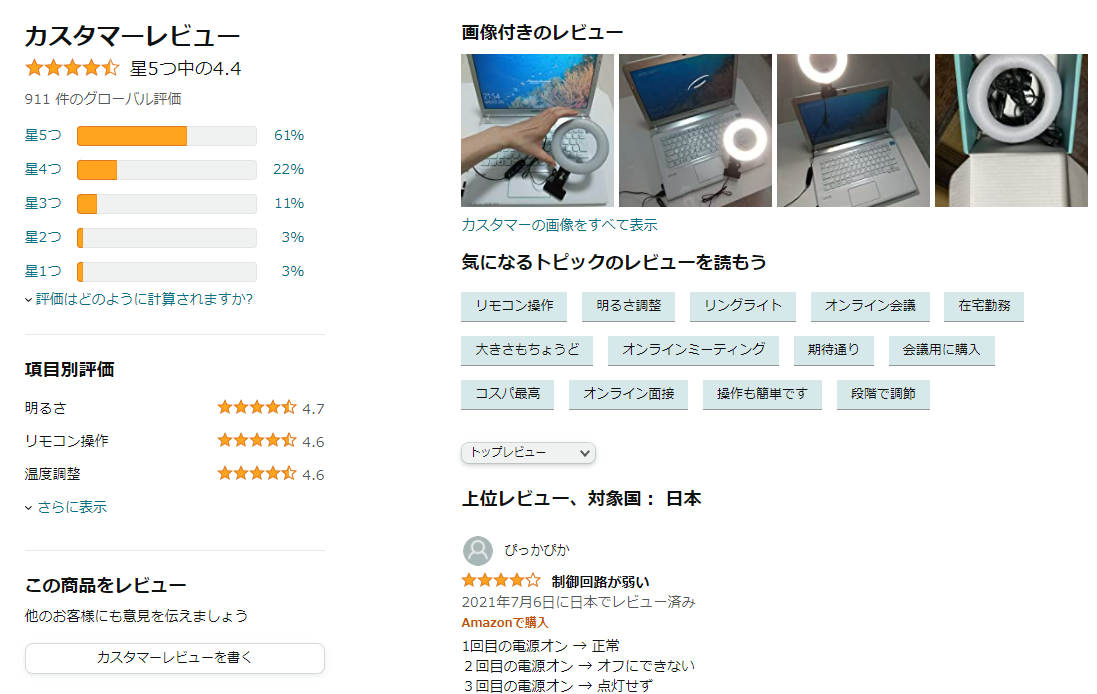

## 体験しよう！  
## 固有表現認識  
displaCy Named Entity Visualizer · Explosion  
https://explosion.ai/demos/displacy-ent  

成田悠輔 - Wikipedia

データやエビデンスを活用することによって自己の存在理由や目的を発見し、最適化された行動を取ることで、人々は日常の小さな判断から解放され、真の幸福が訪れるという「幸福なデータ奴隷」論を提唱している。実弟はクラウドワークス取締役兼CINO（最高イノベーション責任者）の成田修造。

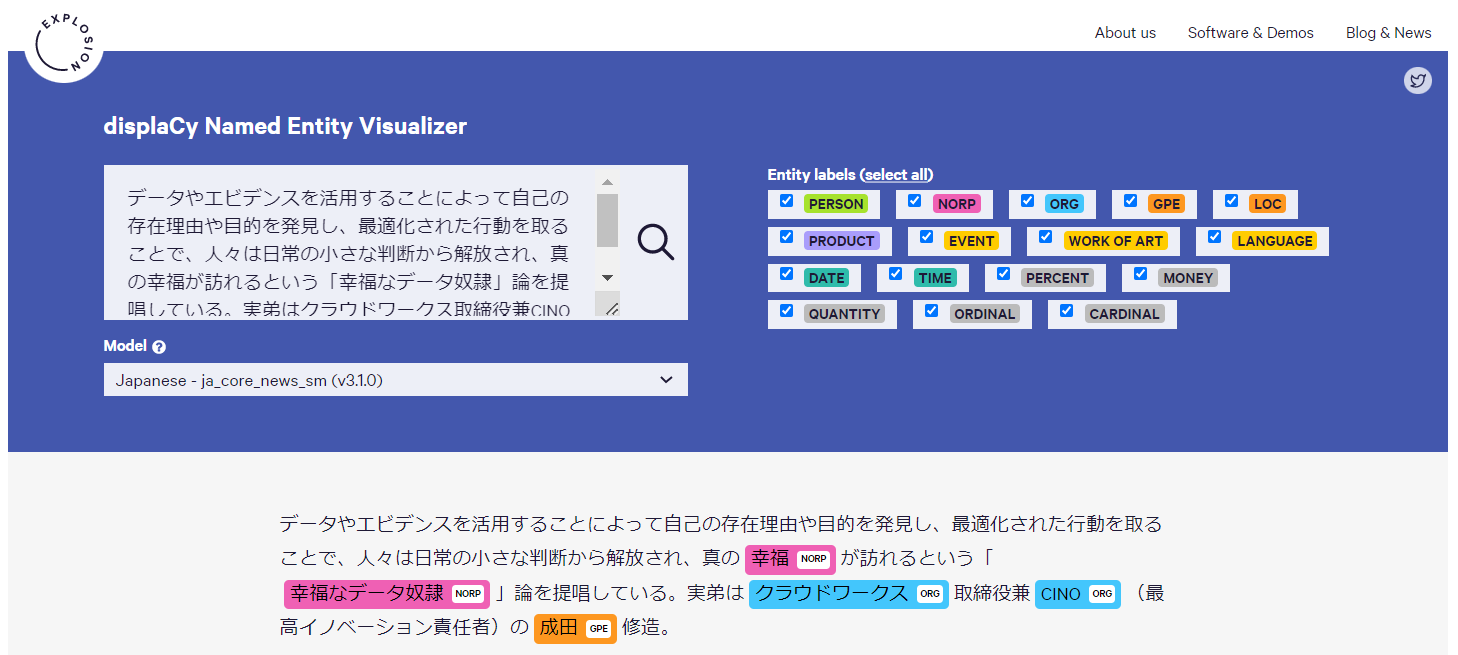



グーグルはモトローラを買収した。彼らが破綻していたからだ。  

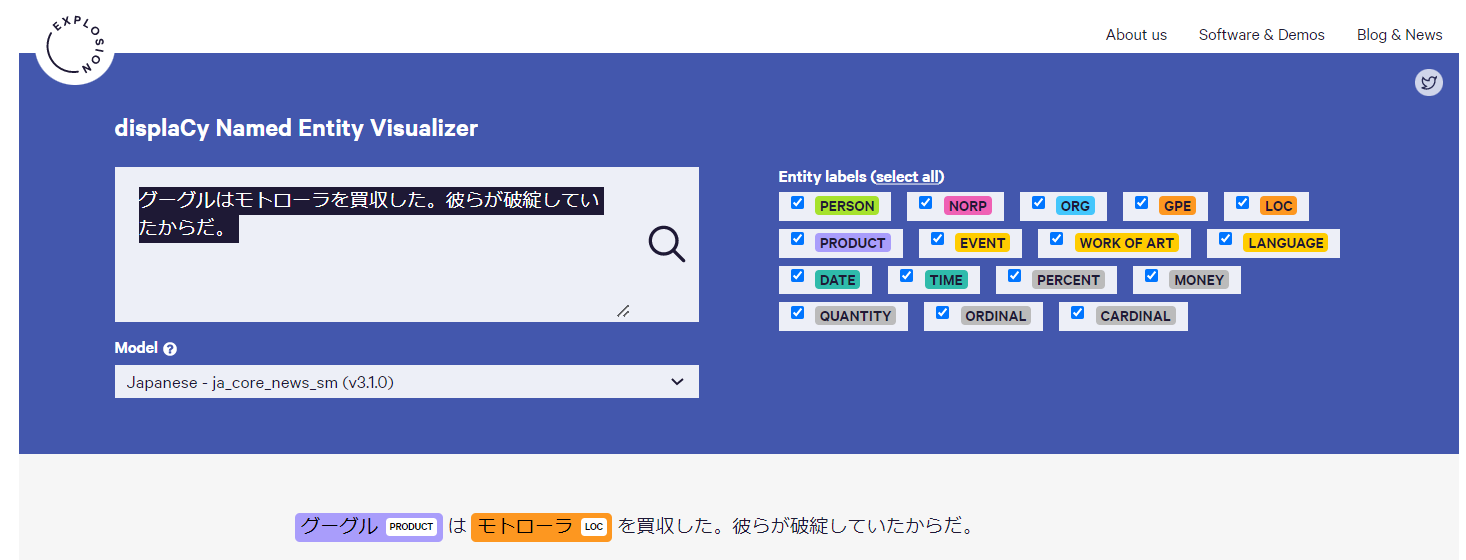

## 上記のようなものを実装してゆきます。

その前に、以下のような文章を考えてみましょう。
- 「グーグルはモトローラを買収した。彼らが破綻していたからだ。」  
- 「ボブはジャックにオムレツを作った。彼は作り方を知っていたからだ。」  
- 「メアリーはスーザンの部屋を掃除した。そして彼女は感謝した。」  

→代名詞が何を受けているかが、重要になります。
→→主に、代名詞が指しているものを当てて競わせたコンテストを、ウイノグラードスキーマ(**Winograd Schema Challenge**)と言います。
→→→国際的なコンテストです。

  
日本語Winograd Schema Challengeの構築と分析  
言語処理学会 第21回年次大会 発表論文集 (2015年3月)   
https://www.anlp.jp/proceedings/annual_meeting/2015/pdf_dir/E3-1.pdf  

## Explosion.aiのdisplaCy  
https://explosion.ai/demos/displacy  ## Explosion.aiのdisplaCy  



## 代名詞が何を指すかは、係り受けも影響してくる。  
→ここで、係り受け解析が登場します！  
→→固有表現抽出は、係り受け解析の適切さが重要なファクターになっています。  

displaCy Dependency Visualizer · Explosion  
https://explosion.ai/demos/displacy  

「グーグルはモトローラを買収した。彼らが破綻していたからだ。」    

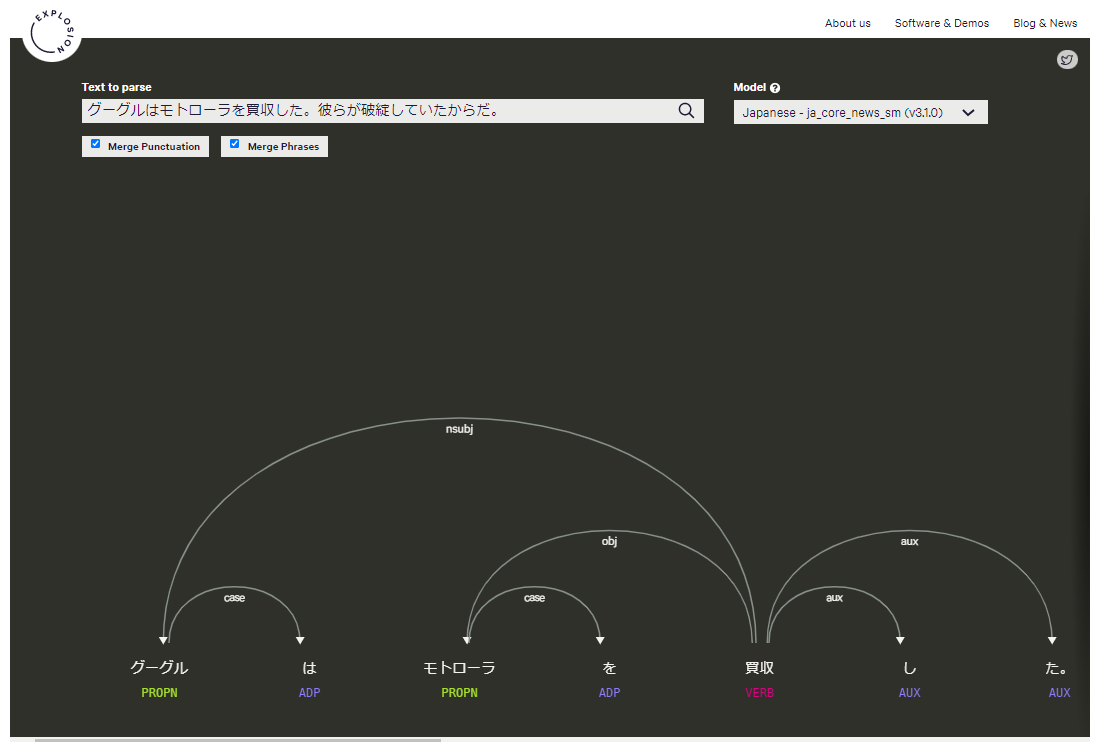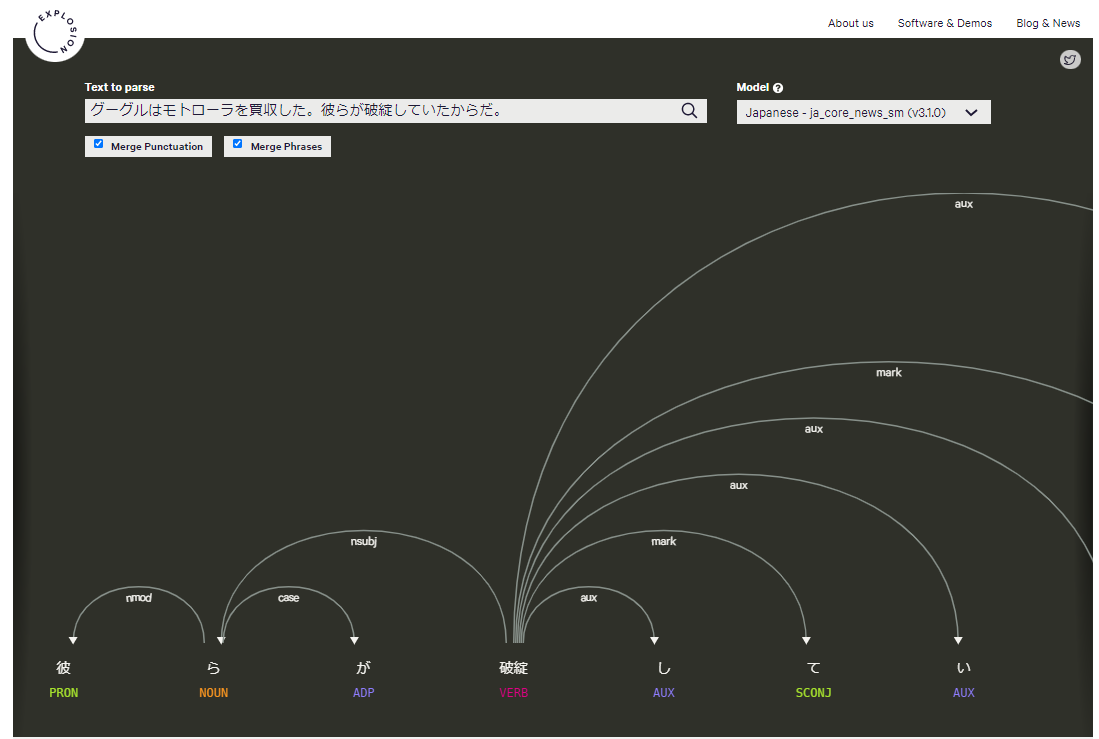

## コラムその1  少し休憩してくださいー  
## 例）太郎はお腹が空いた。彼はビスケットをつまんだ。  
  
## 照応解析とは、  
## 照応詞が参照する先行詞を同定する処理を照応解析という。  
## 照応解析の教師データで学習させた精度は60-70％。  

※1回目資料 2022/02/25  
https://www.slideshare.net/otanet/python-nlp-handson20220225v5  
  
  
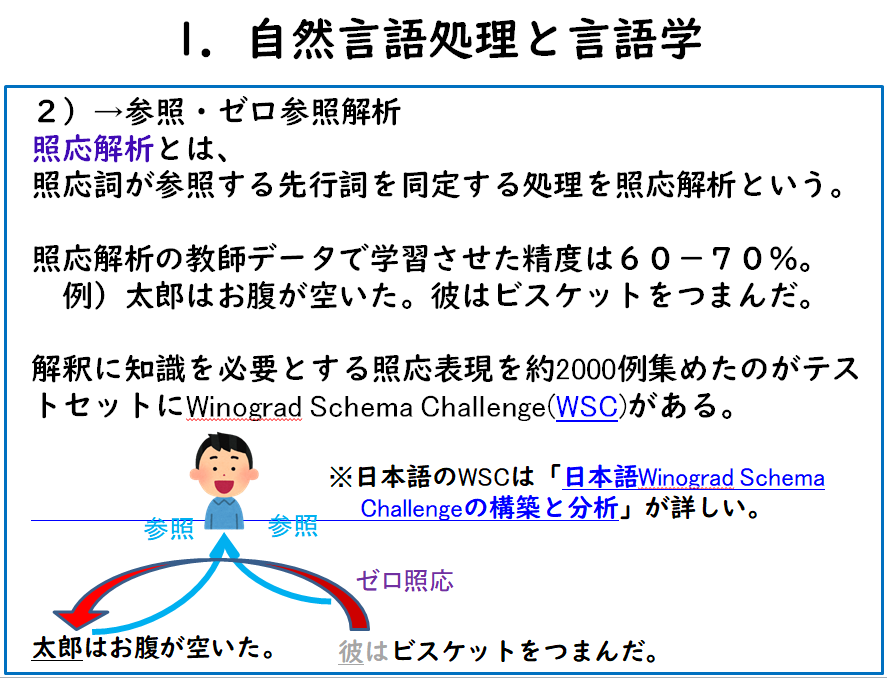

## コラム その2 少し休憩!
##固有表現抽出のタスクや係り受け解析から、日常会話などの話し言葉では、やはり、省略されている代名詞は補えないといけないかな…と思いました。

## 皆さまは、いかがお考えでしょうか?




## まとめ: 情報抽出のタスクとそのパイプライン  
  
※ 共参照解析は下記を参照してください。  
共参照解析のための事象間関係知識の文脈化  
http://naoya-i.github.io/resources/nlp2014-paper.pdf  


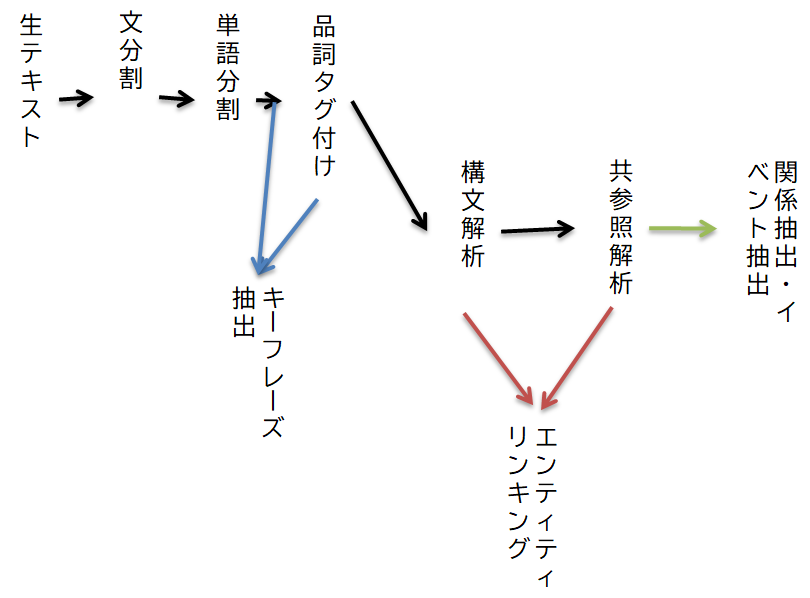

## GINZAとspacyとを用いて、固有表現抽出を行います。

In [ ]:
# GiNZAのインストール
!pip install ginza==4.0.5

# メニュー「ランタイム → ランタイムを再起動」で「Google Colab」を再起動

In [ ]:
import spacy
from spacy import displacy
nlp = spacy.load('ja_ginza')
doc = nlp('山田さんと銀座でランチをご一緒しましょう。')

# 固有表現抽出
for ent in doc.ents:
    print(
        ent.text+','+ # テキスト
        ent.label_+','+ # ラベル
        str(ent.start_char)+','+ # 開始位置
        str(ent.end_char)) # 終了位置

# 固有表現抽出の強調表示
displacy.render(doc, style='ent', jupyter=True)

山田,Person,0,2
さん,Title_Other,2,4
銀座,City,5,7


In [ ]:
import spacy
nlp = spacy.load('ja_ginza')

# 固有表現抽出
doc = nlp('サツキと妹のメイは、母の療養のために父と一緒に農村へ引っ越してきた。')
for ent in doc.ents:
    print(
        ent.text+','+ # テキスト
        ent.label_+','+ # ラベル
        str(ent.start_char)+','+ # 開始位置
        str(ent.end_char) # 終了位置
    )

In [ ]:
import spacy
nlp = spacy.load('ja_ginza')

# 固有表現ルールの追加
from spacy.pipeline import EntityRuler
ruler = EntityRuler(nlp)
ruler.add_patterns([
    {'label': 'Person', 'pattern': 'サツキ'},
    {'label': 'Person', 'pattern': 'メイ'}])
nlp.add_pipe(ruler)

# 固有表現抽出
doc = nlp('サツキと妹のメイは、母の療養のために父と一緒に農村へ引っ越してきた。')
for ent in doc.ents:
    print(
        ent.text+','+ # テキスト
        ent.label_+','+ # ラベル
        str(ent.start_char)+','+ # 開始位置
        str(ent.end_char)) # 終了位置

サツキ,Person,0,3
メイ,Person,6,8


In [ ]:
import spacy
import random

# 固有抽出表現モデルの学習の関数定義
def train_ner(train_data, epoch):
    # 日本語の空モデルの生成
    nlp = spacy.blank('ja')

    # 固有表現抽出モデルのパイプの追加
    if 'ner' not in nlp.pipe_names:
        ner = nlp.create_pipe('ner')
        nlp.add_pipe(ner, last=True)

    # ラベルの追加
    for _, annotations in train_data:
        for ent in annotations.get('entities'):
            ner.add_label(ent[2])

    # 固有表現抽出モデルのみ学習
    other_pipes = [pipe for pipe in nlp.pipe_names if pipe != 'ner']
    with nlp.disable_pipes(*other_pipes):
        optimizer = nlp.begin_training()
       
        # 学習ループ
        for itn in range(epoch):
            # シャッフル
            random.shuffle(train_data)
           
            # 学習
            losses = {}
            for text, annotations in train_data:
                nlp.update([text], [annotations], drop=0.2, sgd=optimizer, losses=losses)
            print('iteration'+str(itn)+': '+str(losses['ner']))
    return nlp

# 学習データの準備
train_data = [
    ('入院している母のお見舞いに行ったサツキとメイはオバケ屋敷のことを報告した。', 
        {'entities': [(16, 19, 'Person'),(20, 22, 'Person')]}),
    ('サツキとメイが森のバス停で雨の中父の帰りを待っている。', 
        {'entities': [(0, 3, 'Person'), (4, 6, 'Person')]}),
    ('1人で遊んでいたメイは庭で不思議な生き物を見つけた。', 
        {'entities': [(8, 10, 'Person')]}),
    ('人が住み始めるといつのまにか居なくなるという話を聞いてサツキは拍子抜けした。', 
        {'entities': [(27, 30, 'Person')]})
]

# 固有表現抽出モデルの学習
nlp = train_ner(train_data, 100)

# 固有表現抽出モデルの保存
nlp.to_disk('ner_model')

/usr/local/lib/python3.7/dist-packages/spacy/language.py:639: UserWarning: [W033] Training a new parser or NER using a model with an empty lexeme normalization table. This may degrade the performance to some degree. If this is intentional or this language doesn't have a normalization table, please ignore this warning.
  **kwargs


iteration0: 66.40738767385483
iteration1: 34.41533449292183
iteration2: 11.754171626129391
iteration3: 11.149365315807245
iteration4: 7.046449599904008
iteration5: 4.707474197690317
iteration6: 3.7063626780415575
iteration7: 2.424889596542723
iteration8: 0.17531016006840533
iteration9: 0.003777896114070164
iteration10: 0.0001295406321382221
iteration11: 3.2897749634817235e-06
iteration12: 3.3971748630048675e-07
iteration13: 4.7825353892432606e-08
iteration14: 6.767441200202163e-06
iteration15: 3.178224883312395e-07
iteration16: 9.061719748603786e-08
iteration17: 5.7492774525229785e-09
iteration18: 6.404760475964735e-10
iteration19: 1.4155680112664314e-08
iteration20: 7.2312249169635645e-09
iteration21: 8.183571971440759e-10
iteration22: 1.05503389525164e-09
iteration23: 2.3383057297302483e-09
iteration24: 9.955674735930169e-09
iteration25: 1.3331118183251778e-08
iteration26: 2.513504603299323e-08
iteration27: 4.3957279657780056e-09
iteration28: 6.912358914282514e-10
iteration29: 2.1362

In [ ]:
import spacy

# 固有表現抽出モデルの読み込み
nlp = spacy.load('ner_model')

# 固有表現抽出
doc = nlp('サツキと妹のメイは、母の療養のために父と一緒に農村へ引っ越してきた。')
for ent in doc.ents:
    print(
        ent.text+','+ # テキスト
        ent.label_+','+ # ラベル
        str(ent.start_char)+','+ # 開始位置
        str(ent.end_char) # 終了位置
    )

サツキ,Juridical_Person,0,3


## Wikipediaを用いた固有表現抽出データセットで学習
https://github.com/stockmarkteam/ner-wikipedia-dataset

各ラベルのデータ数
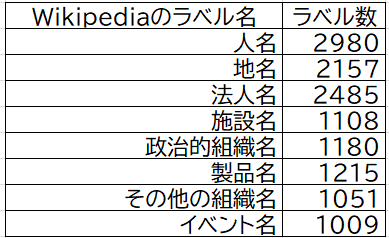

In [ ]:
%%time
import spacy
import random

# 固有抽出表現モデルの学習の関数定義
def train_ner(train_data, epoch):
    # 日本語の空モデルの生成
    nlp = spacy.blank('ja')

    # 固有表現抽出モデルのパイプの追加
    if 'ner' not in nlp.pipe_names:
        ner = nlp.create_pipe('ner')
        nlp.add_pipe(ner, last=True)

    # ラベルの追加
    for _, annotations in train_data:
        for ent in annotations.get('entities'):
            ner.add_label(ent[2])

    # 固有表現抽出モデルのみ学習
    other_pipes = [pipe for pipe in nlp.pipe_names if pipe != 'ner']
    with nlp.disable_pipes(*other_pipes):
        optimizer = nlp.begin_training()
       
        # 学習ループ
        for itn in range(epoch):
            # シャッフル
            random.shuffle(train_data)
           
            # 学習
            losses = {}
            for text, annotations in train_data:
                nlp.update([text], [annotations], drop=0.2, sgd=optimizer, losses=losses)
            print('iteration{}: {:.8f}'.format(itn, losses['ner']))
    return nlp

# 学習データの準備
train_data = [
    ('入院している母のお見舞いに行ったサツキとメイはオバケ屋敷のことを報告した。', 
        {'entities': [(16, 19, 'Person'),(20, 22, 'Person')]}),
    ('サツキとメイが森のバス停で雨の中父の帰りを待っている。', 
        {'entities': [(0, 3, 'Person'), (4, 6, 'Person')]}),
    ('1人で遊んでいたメイは庭で不思議な生き物を見つけた。', 
        {'entities': [(8, 10, 'Person')]}),
    ('人が住み始めるといつのまにか居なくなるという話を聞いてサツキは拍子抜けした。', 
        {'entities': [(27, 30, 'Person')]})
]

# 固有表現抽出モデルの学習
nlp = train_ner(train_data, 50)

# 固有表現抽出モデルの保存
nlp.to_disk('ner_model')

/usr/local/lib/python3.7/dist-packages/spacy/language.py:639: UserWarning: [W033] Training a new parser or NER using a model with an empty lexeme normalization table. This may degrade the performance to some degree. If this is intentional or this language doesn't have a normalization table, please ignore this warning.
  **kwargs


iteration0: 66.68065423
iteration1: 36.16807459
iteration2: 10.83252557
iteration3: 9.87055772
iteration4: 6.16514302
iteration5: 5.11692530
iteration6: 4.11444830
iteration7: 3.88149986
iteration8: 0.86095700
iteration9: 0.01138188
iteration10: 0.00014428
iteration11: 0.00103710
iteration12: 0.00002068
iteration13: 0.00028177
iteration14: 0.00000066
iteration15: 0.00000041
iteration16: 0.00000004
iteration17: 0.00000002
iteration18: 0.00000000
iteration19: 0.00000026
iteration20: 0.00000014
iteration21: 0.00023023
iteration22: 0.00000001
iteration23: 0.00000000
iteration24: 0.00000000
iteration25: 0.00000000
iteration26: 0.00000000
iteration27: 0.00000000
iteration28: 0.00000000
iteration29: 0.00000000
iteration30: 0.00000000
iteration31: 0.00000057
iteration32: 0.00000003
iteration33: 0.00000028
iteration34: 0.00000001
iteration35: 0.00000005
iteration36: 0.00000000
iteration37: 0.00000000
iteration38: 0.00000000
iteration39: 0.00000000
iteration40: 0.00000000
iteration41: 0.00000000

In [ ]:
import spacy

# 固有表現抽出モデルの読み込み
nlp = spacy.load('ner_model')

# 固有表現抽出
doc = nlp('ボブはジャックにオムレツを作った。彼は作り方を知っていたからだ。')
for ent in doc.ents:
    print(
        ent.text+','+ # テキスト
        ent.label_+','+ # ラベル
        str(ent.start_char)+','+ # 開始位置
        str(ent.end_char) # 終了位置
    )

ボブ,Person,0,2
ジャック,Person,3,7
オムレツ,Person,8,12


In [ ]:
%%time
import spacy
import random

# 固有抽出表現モデルの学習の関数定義
def train_ner(train_data, epoch):
    # 日本語の空モデルの生成
    nlp = spacy.blank('ja')

    # 固有表現抽出モデルのパイプの追加
    if 'ner' not in nlp.pipe_names:
        ner = nlp.create_pipe('ner')
        nlp.add_pipe(ner, last=True)

    # ラベルの追加
    for _, annotations in train_data:
        for ent in annotations.get('entities'):
            ner.add_label(ent[2])

    # 固有表現抽出モデルのみ学習
    other_pipes = [pipe for pipe in nlp.pipe_names if pipe != 'ner']
    with nlp.disable_pipes(*other_pipes):
        optimizer = nlp.begin_training()
       
        # 学習ループ
        for itn in range(epoch):
            # シャッフル
            random.shuffle(train_data)
           
            # 学習
            losses = {}
            for text, annotations in train_data:
                nlp.update([text], [annotations], drop=0.2, sgd=optimizer, losses=losses)
            print('iteration{}: {:.8f}'.format(itn, losses['ner']))
    return nlp

# 学習データの準備
import json
labels = {
    '人名': 'Person',
    '法人名': 'Juridical_Person',
    '政治的組織名': 'Political_Organization',
    'その他の組織名': 'Organization_Other',
    '地名': 'Location',
    '施設名': 'Facility',
    '製品名': 'Product',
    'イベント名': 'Event',
}
json_data = json.load(open('ner.json', 'r'))
train_data = []
for data in json_data:
    text = data['text']
    entities = data['entities']
    value = []
    for entity in entities:
        span = entity['span']
        label = labels[entity['type']]
        value.append((span[0], span[1], label))
    train_data.append((text, {'entities': value}))

# 固有表現抽出モデルの学習
nlp = train_ner(train_data, 50)

# 固有表現抽出モデルの保存
nlp.to_disk('ner_model')

/usr/local/lib/python3.7/dist-packages/spacy/language.py:639: UserWarning: [W033] Training a new parser or NER using a model with an empty lexeme normalization table. This may degrade the performance to some degree. If this is intentional or this language doesn't have a normalization table, please ignore this warning.
  **kwargs
/usr/local/lib/python3.7/dist-packages/spacy/language.py:482: UserWarning: [W030] Some entities could not be aligned in the text "1996年4月、関東学院大学軽音楽部内で結成された。" with entities "[(8, 14, 'Juridical_Person'), (14, 18, 'Organizati...". Use `spacy.gold.biluo_tags_from_offsets(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities (with BILUO tag '-') will be ignored during training.
  gold = GoldParse(doc, **gold)
/usr/local/lib/python3.7/dist-packages/spacy/language.py:482: UserWarning: [W030] Some entities could not be aligned in the text "また、草戸稲荷神社前には遊女町を造ったといわれる。" with entities "[(3, 9, 'Facility')]". Use `spacy.gold.biluo_tags_from_offsets(nlp.

iteration0: 34220.88704094
iteration1: 26197.24527643
iteration2: 22119.36107840
iteration3: 20136.16466980
iteration4: 17798.14392708
iteration5: 15905.72280270
iteration6: 14519.89174614
iteration7: 13583.61912326
iteration8: 12349.30753228
iteration9: 11947.60758318
iteration10: 10916.42498160
iteration11: 10260.11514087
iteration12: 9880.45327546
iteration13: 9363.31392592
iteration14: 9090.26961752
iteration15: 8813.72828586
iteration16: 8532.71048907
iteration17: 7685.87967975
iteration18: 7778.01998424
iteration19: 7655.85276246
iteration20: 7446.69301449
iteration21: 7034.29964101
iteration22: 6608.66827099
iteration23: 6718.40960071
iteration24: 6201.29772879
iteration25: 6199.02549200
iteration26: 6028.07215980
iteration27: 6014.73800543
iteration28: 5898.55302960
iteration29: 5589.09087495
iteration30: 5533.23000678
iteration31: 5480.81584789
iteration32: 5590.38095951
iteration33: 4912.70952437
iteration34: 4799.85403773
iteration35: 4891.69313830
iteration36: 4713.00152955

In [ ]:
import spacy

# 固有表現抽出モデルの読み込み
nlp = spacy.load('ner_model')

# 固有表現抽出
doc = nlp('グーグルはモトローラを買収した。彼らが破綻していたからだ。')
for ent in doc.ents:
    print(
        ent.text+','+ # テキスト
        ent.label_+','+ # ラベル
        str(ent.start_char)+','+ # 開始位置
        str(ent.end_char) # 終了位置
    )

グーグル,Juridical_Person,0,4
モトローラ,Juridical_Person,5,10


## 結果の考察
グーグル,Juridical_Person,0,4
モトローラ,Juridical_Person,5,10

グーグルもモトローラも法人名として、認識されている。

## まとめ
## 1.**情報抽出とは**
テキストから関連する情報を抽出するタスクのこと。
1987年から1998年に、アメリカ海軍がMessage Understanding Conferenceを主催したのが始まり。

## 2.**Google検索が情報抽出の代表的なアプリケーション**  
この「成田悠輔の出生地はどこ」のクエリ  
→[成田悠輔]が人物であることを理解している上で、出生地を探すことが必要。  
→→これを、*固有表現抽出(Named Entity Reognition:NER)*と言う。

## 3.**「アップルはどこ」 というクエリ**を投げてみたところ…  
食べ物の「アップル」ではなく、会社の「アップル」という一意にした上で、表示している。  

→*固有表現の曖昧性解消*または*エンティティリンキング*という。  

→→さらに、「ティム・クックがアップルのCEOです。」
このタスクを関係抽出という。


例2）「表参道でおすすめのお店は」



## **4.キーフレーズ抽出とは**、  
**与えられたテキストから、文章の要点を捉えた重要な単語やフレーズを抽出する情報抽出タスクのこと**です。  

→Amazonの気になるトピックのレビューを読もうのところがキーフレーズ抽出。  

代名詞が何を指すかは、*係り受け*も影響してくる。
→固有表現抽出は、係り受け解析の適切さが重要なファクターになっています。

## **5.言語学の照応解析を振り返る**
コラムその1  
例）太郎はお腹が空いた。彼はビスケットをつまんだ。  
照応解析とは、照応詞が参照する先行詞を同定する処理を照応解析という。

コラム その2  
話し言葉での固有表現抽出へ
固有表現抽出のタスクや係り受け解析から、日常会話などの話し言葉では、やはり、省略されている代名詞は補えないといけない!?


## **6. GINZAとspacyとによる固有表現抽出の実装**  
法人名としてのグーグルとモトローラが認識できました。


### 参考文献一覧
参考文献一覧

displaCy Named Entity Visualizer · Explosion  
https://explosion.ai/demos/displacy-ent  


Explosion.aiのdisplaCy  
https://explosion.ai/demos/displacy ## Explosion.aiのdisplaCy  


日本語Winograd Schema Challengeの構築と分析  
言語処理学会 第21回年次大会 発表論文集 (2015年3月)  
https://www.anlp.jp/proceedings/annual_meeting/2015/pdf_dir/E3-1.pdf  


displaCy Dependency Visualizer · Explosion  
https://explosion.ai/demos/displacy  


※Pythonによる自然言語処理ハンズオン1 資料  2022/02/25  
https://www.slideshare.net/otanet/python-nlp-handson20220225v5  


共参照解析のための事象間関係知識の文脈化  
http://naoya-i.github.io/resources/nlp2014-paper.pdf  


Language modeling  
https://huggingface.co/docs/transformers/tasks/language_modeling  


Text classification  
https://huggingface.co/docs/transformers/tasks/sequence_classification  


Pipelines for inference  
https://huggingface.co/docs/transformers/pipeline_tutorial  

